In [4]:
import numpy as np
import matplotlib.pyplot as plt
from pandas import read_csv
import math

In [3]:
from keras.models import Sequential
from keras.layers import Dense, SimpleRNN
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error

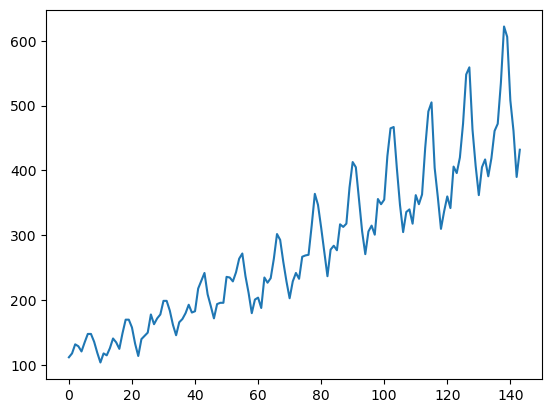

In [6]:
# load the dataset
dataframe = read_csv('AirPassengers.csv', usecols=[1])
plt.plot(dataframe)

In [7]:
#Convert pandas dataframe to numpy array
dataset = dataframe.values
dataset = dataset.astype('float32') #COnvert values to float

In [8]:
# normalize the dataset using MinMax
scaler = MinMaxScaler(feature_range=(0, 1)) 
dataset = scaler.fit_transform(dataset)

In [9]:
# split into train and test sets
train_size = int(len(dataset) * 0.66)
test_size = len(dataset) - train_size
train, test = dataset[0:train_size,:], dataset[train_size:len(dataset),:]

In [10]:
#creates a dataset where X is the number of passengers at a given time (t, t-1, t-2...) 
#and Y is the number of passengers at the next time (t + 1).

def to_sequences(dataset, seq_size=1):
    x = []
    y = []

    for i in range(len(dataset)-seq_size-1):
        #print(i)
        window = dataset[i:(i+seq_size), 0]
        x.append(window)
        y.append(dataset[i+seq_size, 0])
        
    return np.array(x),np.array(y)
    

seq_size = 4 # Number of time steps to look back 
trainX, trainY = to_sequences(train, seq_size)
testX, testY = to_sequences(test, seq_size)

In [11]:
# Reshape the input
trainX = np.reshape(trainX, (trainX.shape[0], trainX.shape[1], 1))
testX = np.reshape(testX, (testX.shape[0], testX.shape[1], 1))


In [12]:
# create and fit dense model  (Simple RNN)


model = Sequential([
    SimpleRNN(20, return_sequences=True, input_shape=[None,1]),
    SimpleRNN(20),
    Dense(30),
    Dense(1)
    ])




model.compile(loss='mean_squared_error', optimizer='adam', metrics = ['acc'])
print(model.summary()) 

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 simple_rnn (SimpleRNN)      (None, None, 20)          440       
                                                                 
 simple_rnn_1 (SimpleRNN)    (None, 20)                820       
                                                                 
 dense (Dense)               (None, 30)                630       
                                                                 
 dense_1 (Dense)             (None, 1)                 31        
                                                                 
Total params: 1921 (7.50 KB)
Trainable params: 1921 (7.50 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
None


In [13]:
# Normal Training
model.fit(trainX, trainY, validation_data=(testX, testY), verbose=2, epochs=100)

trainPredict = model.predict(trainX)
testPredict = model.predict(testX)

Epoch 1/100
3/3 - 6s - loss: 0.0098 - acc: 0.0111 - val_loss: 0.0522 - val_acc: 0.0227 - 6s/epoch - 2s/step
Epoch 2/100
3/3 - 0s - loss: 0.0108 - acc: 0.0111 - val_loss: 0.0375 - val_acc: 0.0227 - 122ms/epoch - 41ms/step
Epoch 3/100
3/3 - 0s - loss: 0.0061 - acc: 0.0111 - val_loss: 0.0219 - val_acc: 0.0227 - 129ms/epoch - 43ms/step
Epoch 4/100
3/3 - 0s - loss: 0.0084 - acc: 0.0111 - val_loss: 0.0251 - val_acc: 0.0227 - 134ms/epoch - 45ms/step
Epoch 5/100
3/3 - 0s - loss: 0.0062 - acc: 0.0111 - val_loss: 0.0429 - val_acc: 0.0227 - 145ms/epoch - 48ms/step
Epoch 6/100
3/3 - 0s - loss: 0.0058 - acc: 0.0111 - val_loss: 0.0220 - val_acc: 0.0227 - 150ms/epoch - 50ms/step
Epoch 7/100
3/3 - 0s - loss: 0.0053 - acc: 0.0111 - val_loss: 0.0175 - val_acc: 0.0227 - 122ms/epoch - 41ms/step
Epoch 8/100
3/3 - 0s - loss: 0.0047 - acc: 0.0111 - val_loss: 0.0269 - val_acc: 0.0227 - 96ms/epoch - 32ms/step
Epoch 9/100
3/3 - 0s - loss: 0.0051 - acc: 0.0111 - val_loss: 0.0300 - val_acc: 0.0227 - 195ms/epoch -

3/3 - 0s - loss: 0.0019 - acc: 0.0111 - val_loss: 0.0096 - val_acc: 0.0227 - 135ms/epoch - 45ms/step
Epoch 74/100
3/3 - 0s - loss: 0.0019 - acc: 0.0111 - val_loss: 0.0082 - val_acc: 0.0227 - 86ms/epoch - 29ms/step
Epoch 75/100
3/3 - 0s - loss: 0.0017 - acc: 0.0111 - val_loss: 0.0133 - val_acc: 0.0227 - 100ms/epoch - 33ms/step
Epoch 76/100
3/3 - 0s - loss: 0.0018 - acc: 0.0111 - val_loss: 0.0097 - val_acc: 0.0227 - 105ms/epoch - 35ms/step
Epoch 77/100
3/3 - 0s - loss: 0.0018 - acc: 0.0111 - val_loss: 0.0081 - val_acc: 0.0227 - 101ms/epoch - 34ms/step
Epoch 78/100
3/3 - 0s - loss: 0.0022 - acc: 0.0111 - val_loss: 0.0110 - val_acc: 0.0227 - 80ms/epoch - 27ms/step
Epoch 79/100
3/3 - 0s - loss: 0.0016 - acc: 0.0111 - val_loss: 0.0070 - val_acc: 0.0227 - 93ms/epoch - 31ms/step
Epoch 80/100
3/3 - 0s - loss: 0.0020 - acc: 0.0111 - val_loss: 0.0126 - val_acc: 0.0227 - 90ms/epoch - 30ms/step
Epoch 81/100
3/3 - 0s - loss: 0.0021 - acc: 0.0111 - val_loss: 0.0109 - val_acc: 0.0227 - 104ms/epoch - 3

In [14]:
#to invert the transformation.

trainPredict = scaler.inverse_transform(trainPredict)
trainY_inverse = scaler.inverse_transform([trainY])
testPredict = scaler.inverse_transform(testPredict)
testY_inverse = scaler.inverse_transform([testY])

In [15]:
# calculate root mean squared error
trainScore = math.sqrt(mean_squared_error(trainY_inverse[0], trainPredict[:,0]))
print('Train Score: %.2f RMSE' % (trainScore))

testScore = math.sqrt(mean_squared_error(testY_inverse[0], testPredict[:,0]))
print('Test Score: %.2f RMSE' % (testScore))

Train Score: 21.87 RMSE
Test Score: 59.51 RMSE


In [16]:
# shift train predictions for plotting
#we must shift the predictions so that they align on the x-axis with the original dataset. 
trainPredictPlot = np.empty_like(dataset)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[seq_size:len(trainPredict)+seq_size, :] = trainPredict


In [17]:

# shift test predictions for plotting
testPredictPlot = np.empty_like(dataset)
testPredictPlot[:, :] = np.nan
testPredictPlot[len(trainPredict)+(seq_size*2)+1:len(dataset)-1, :] = testPredict


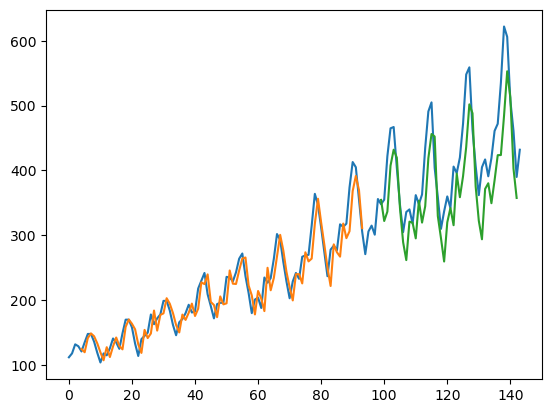

In [18]:
# plot baseline and predictions
plt.plot(scaler.inverse_transform(dataset))
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)
plt.show()